Ensure GPU env

In [1]:
!nvidia-smi

Wed Oct  5 14:48:26 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Install dependencies  




In [2]:
!pip install diffusers==0.3.0
!pip install transformers scipy ftfy
!pip install "ipywidgets>=7,<8"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from google.colab import output
output.enable_custom_widget_manager()

Login

In [4]:
from huggingface_hub import notebook_login

notebook_login()

Login successful
Your token has been saved to /root/.huggingface/token


Init model

In [5]:
from google.colab.patches import cv2_imshow
import torch
from diffusers import StableDiffusionPipeline

# make sure you're logged in with `huggingface-cli login`
pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", revision="fp16", torch_dtype=torch.float16, use_auth_token=True)  
# use GPU
pipe = pipe.to("cuda")
# Using autocast will run inference faster because it uses half-precision.
from torch import autocast

Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

{'trained_betas'} was not found in config. Values will be initialized to default values.


Generate Image

  0%|          | 0/11 [00:00<?, ?it/s]

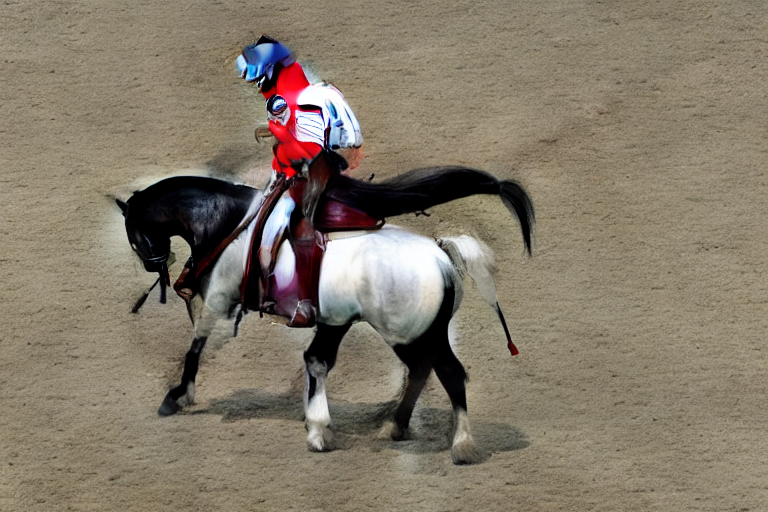

  0%|          | 0/11 [00:00<?, ?it/s]

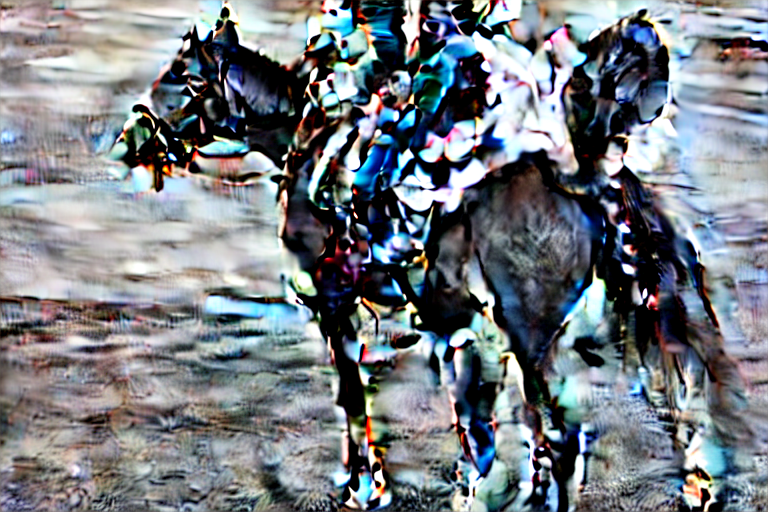

In [ ]:
prompt = "a photograph of a horse riding an astronaut"
prompt2 = " "

generator = torch.Generator("cuda").manual_seed(1025)

with autocast("cuda"):
  #num_inference steps: more=better but slower
  image = pipe(prompt, num_inference_steps=10, height=512, width=768).images[0]  # image here is in [PIL format](https://pillow.readthedocs.io/en/stable/)

  #image.save("image_name.png")
  display(image)

  with autocast("cuda"):
        nxt_image = pipe(prompt=prompt, num_inference_steps=10, init_image=image, strength=0.000000001, guidance_scale=20, height=512, width=768).images[0]

        display(nxt_image)

Try Looping

In [8]:
generator = torch.Generator("cuda").manual_seed(1025)

orig_prompt = "devinantart contemporary art psychedelic jungle mushroom with multicolour lines DMT elves"
init_split = orig_prompt.split()
print(init_split)
len_split = len(init_split)
print("")

import random
iteration_limit = 60
iterations = (iteration_limit//len_split)*len_split
image_store=np.zeros(iterations+1, dtype='object')

for i in range(iterations):
  if i != 0:
    if i%(iterations/len_split) == 0:
          if len(init_split)>1:
                  init_split.pop(random.randrange(len(init_split)))
    prompt = ' '.join(init_split)

  with autocast("cuda"):
    #num_inference steps: more=better but slower
    image_store[i] = pipe(prompt=prompt, num_inference_steps=10, height=512, width=768).images[0]  # image here is in [PIL format](https://pillow.readthedocs.io/en/stable/)

    #image.save("image_name.png")
    display(image_store[i])
    print(prompt)

    with autocast("cuda"):
      image_store[i+1] = pipe(prompt=prompt, num_inference_steps=10, init_image=image_store[i], strength=0.000000001, guidance_scale=20, height=512, width=768).images[0]
      print(image_store[i+1])
      display(image_store[i+1])

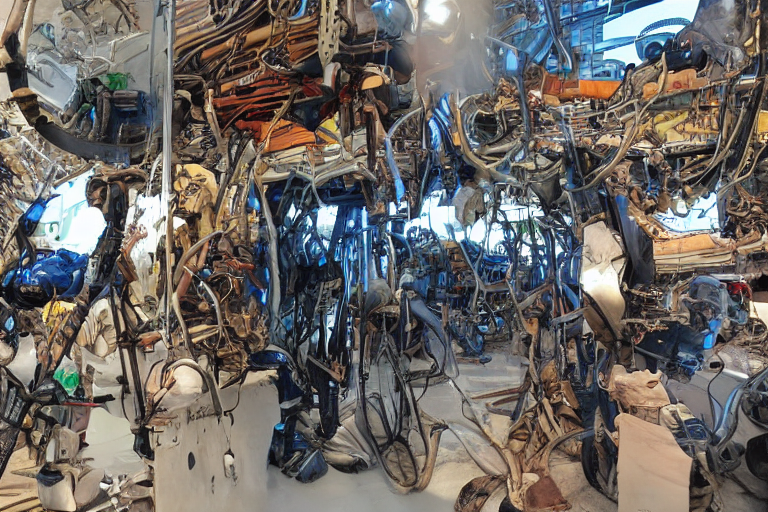

In [ ]:
for i in image_store:
  display(i)

Not getting too abstract as still using the last image + same prompt each time

Could either do a proper img2img model here or do some prompt hacking, like removing words of prompt every 5 iterations or something 


